# Underdeterminedness of EGH Modeling

100%|██████████| 203/203 [00:04<00:00, 46.62it/s] 


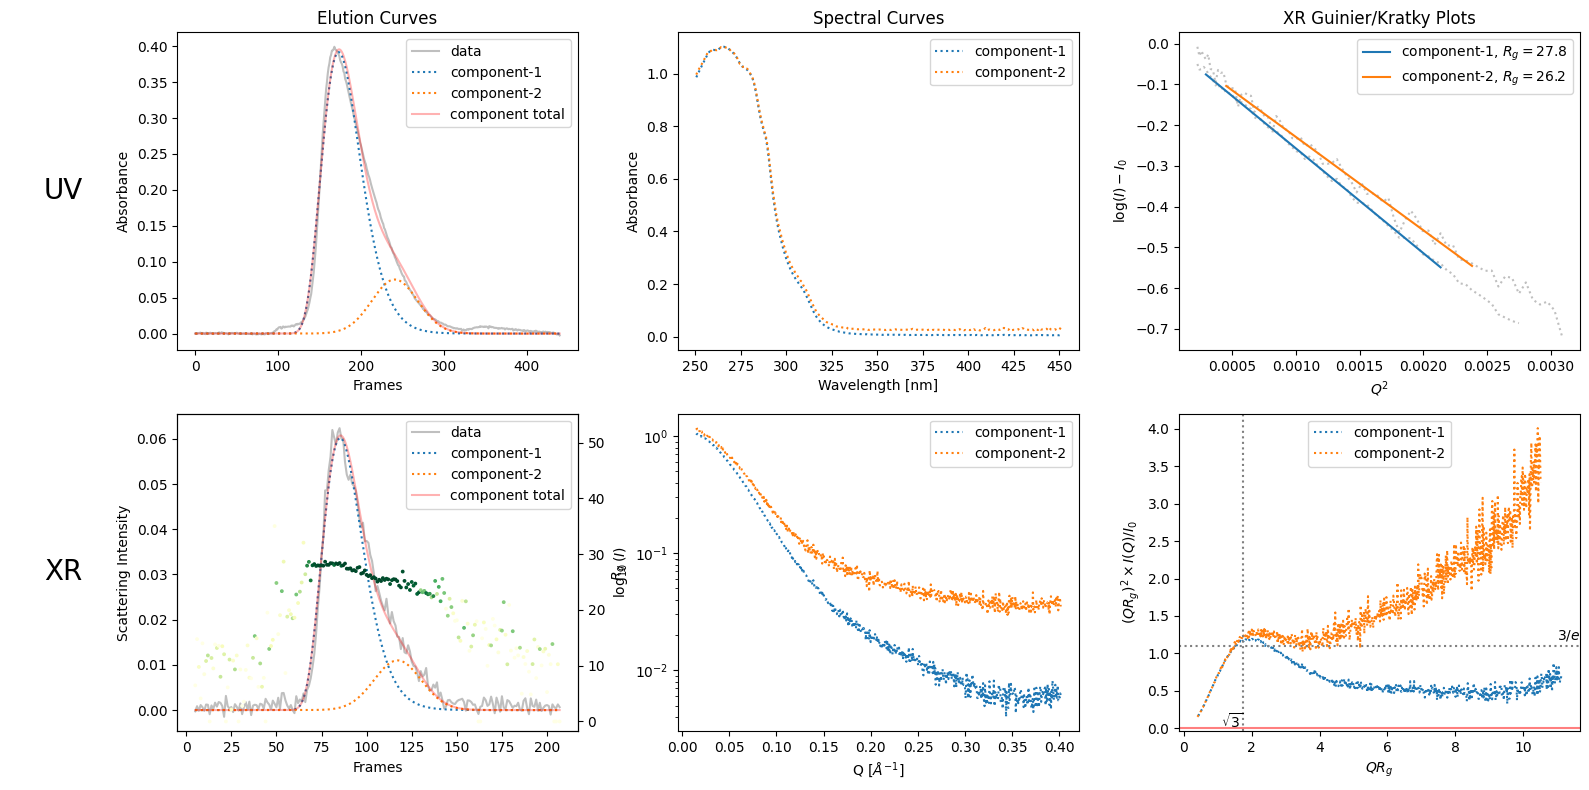

In [8]:
from molass import get_version
assert get_version() >= '0.7.0', "This tutorial requires molass version 0.7.0 or higher."
from molass_data import get_version
assert get_version() >= '0.3.0', "This tutorial requires molass_data version 0.3.0 or higher."
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
rgcurve = corrected_ssd.xr.compute_rgcurve()
decomposition = corrected_ssd.quick_decomposition(num_components=2)
plot1 = decomposition.plot_components(rgcurve=rgcurve) 

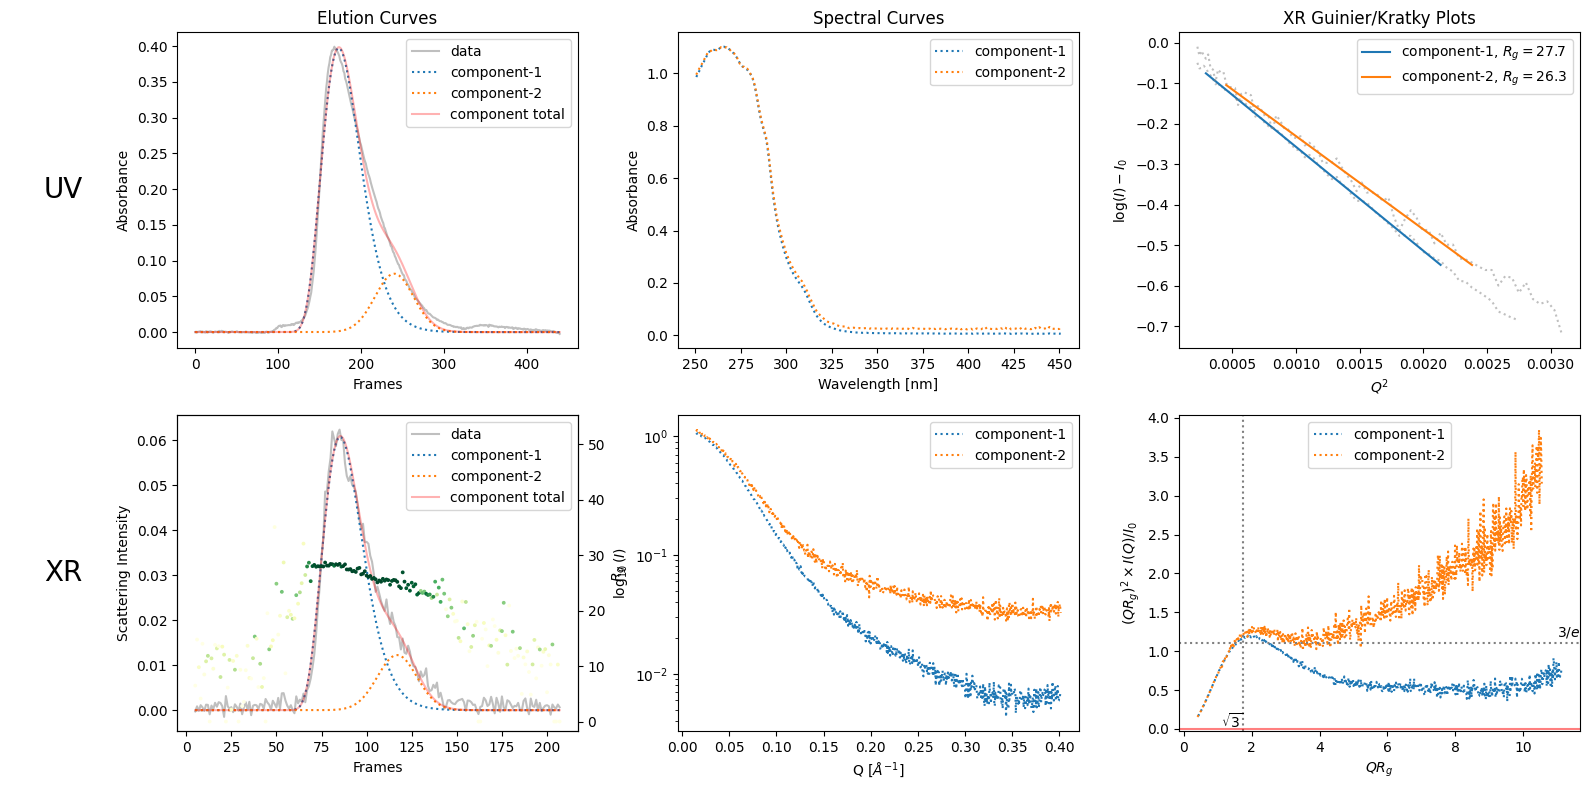

In [9]:
decomposition2_1 = corrected_ssd.quick_decomposition(num_components=2, randomize=0.01, seed=1)
decomposition2_1.plot_components(rgcurve=rgcurve);

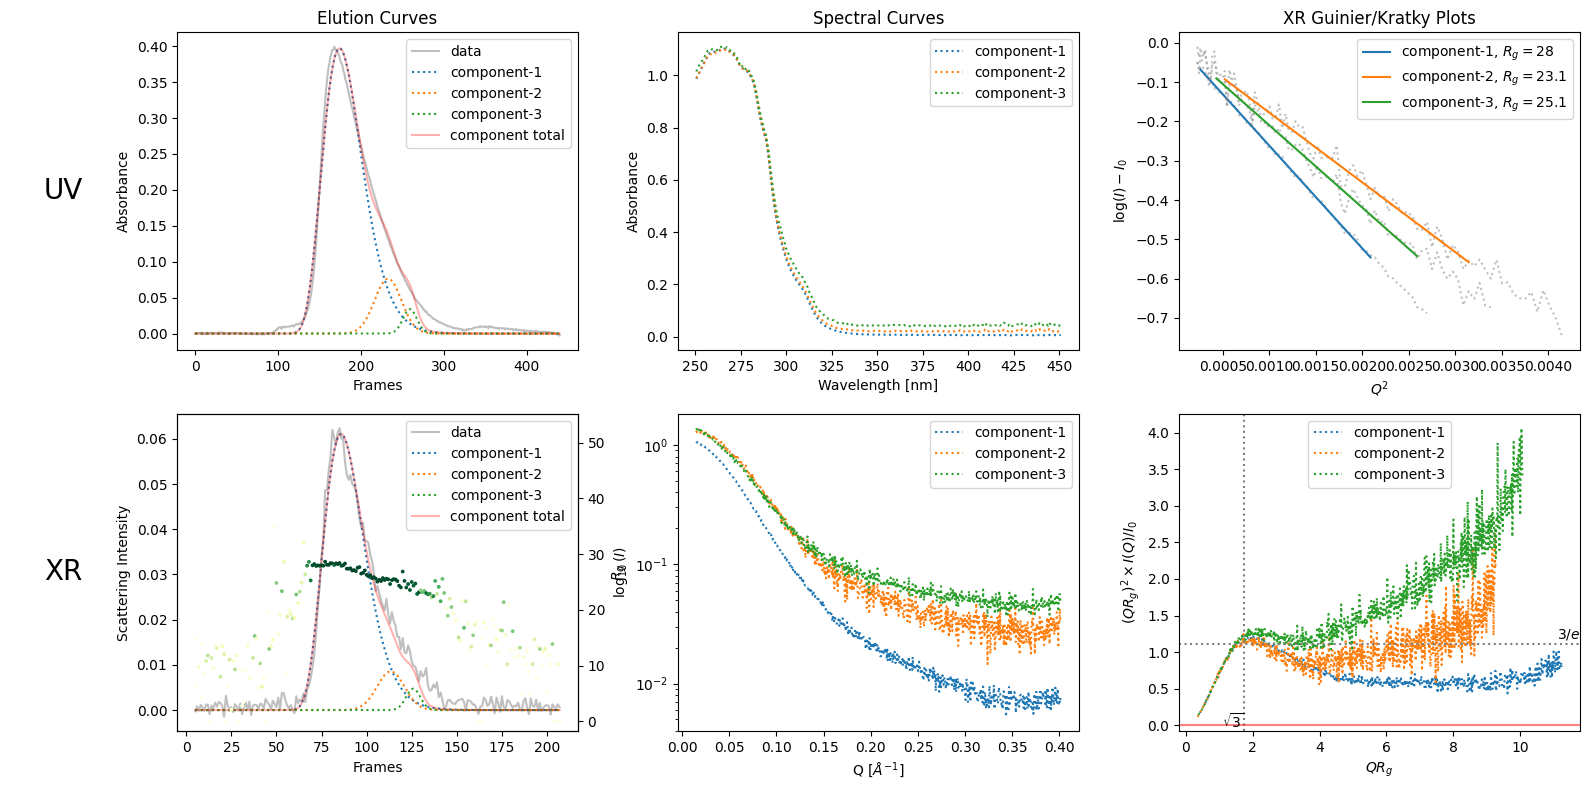

In [10]:
decomposition3 = corrected_ssd.quick_decomposition(num_components=3)
decomposition3.plot_components(rgcurve=rgcurve);

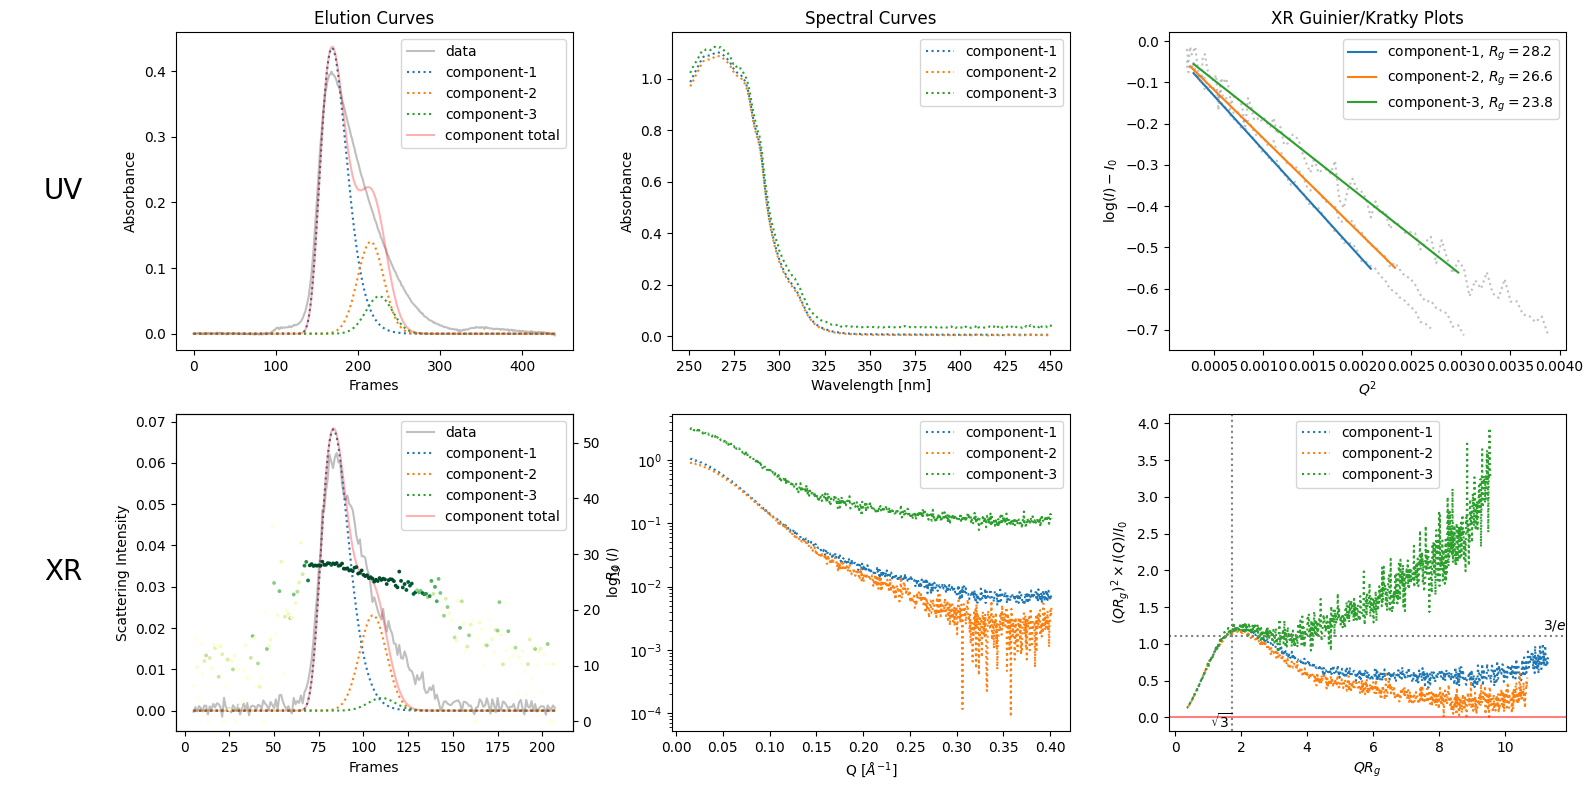

In [11]:
decomposition3_1 = corrected_ssd.quick_decomposition(num_components=3, randomize=0.01, seed=1)
decomposition3_1.plot_components(rgcurve=rgcurve);

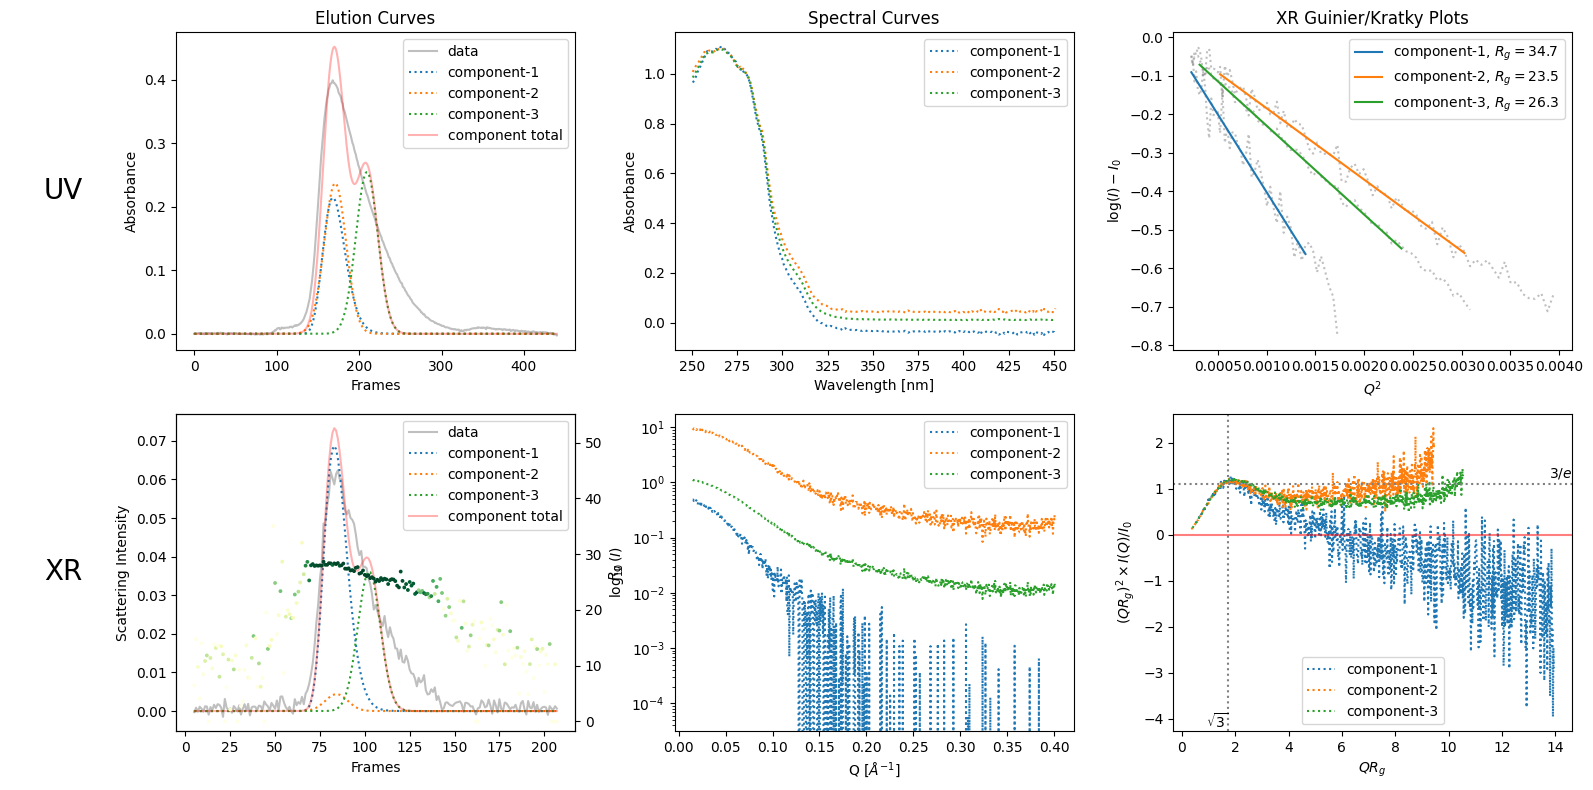

In [12]:
decomposition3_6 = corrected_ssd.quick_decomposition(num_components=3, randomize=0.01, seed=6, debug=False)
decomposition3_6.plot_components(rgcurve=rgcurve);

In [13]:
run_global_optimization = False
if run_global_optimization:
    # Global optimization
    decomposition3_g = corrected_ssd.quick_decomposition(num_components=3, global_opt=True, sec_constraints=True)
    decomposition3_g.plot_components(rgcurve=rgcurve);

In [14]:
if run_global_optimization:
    import matplotlib.pyplot as plt
    for k, curve in enumerate(decomposition3_g.xr_ccurves):
        print([k], curve.params)
        plt.plot(*curve.get_xy())